In [13]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv"

In [97]:
download=requests.get(url).content

In [98]:
df=pd.read_csv(io.StringIO(download.decode()))

In [99]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

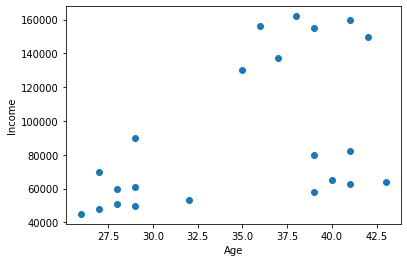

In [100]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [101]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [102]:
km=KMeans(init='k-means++',n_clusters=3)
sc=MinMaxScaler()
X=df[['Age','Income($)']]
X=sc.fit_transform(X)

In [103]:
#y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred=km.fit_predict(X)

In [104]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [105]:
df['cluster']=y_pred

In [87]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

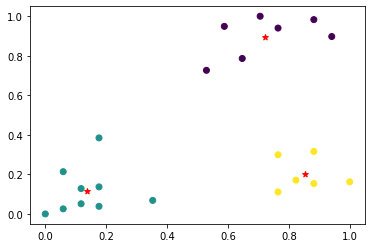

In [115]:
plt.scatter(X[:,0],X[:,1],c=df.cluster)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*')

In [116]:
sse=[]
for k in range(1,10):
  km=KMeans(n_clusters=k)
  km.fit(X)
  sse.append(km.inertia_)

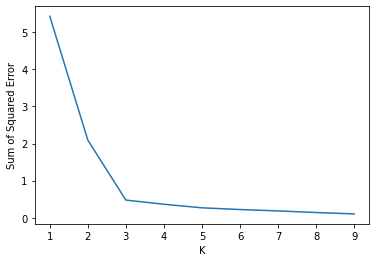

In [119]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(range(1,10),sse)